In [65]:
import pandas as pd
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns



import warnings
warnings.filterwarnings('ignore')

In [101]:
#loading sample of the training dataset with sample size of 100000
df_train = pd.read_csv("C:\\Users\\Rajesh Singh\\Downloads\\microsoft-malware-prediction\\train.csv", nrows = 100000)

In [102]:
#loading sample of the test dataset with sample size of 100000
df_test= pd.read_csv("C:\\Users\\Rajesh Singh\\Downloads\\microsoft-malware-prediction\\test.csv", nrows= 50000)

In [103]:
df_train.columns

Index(['MachineIdentifier', 'ProductName', 'EngineVersion', 'AppVersion',
       'AvSigVersion', 'IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode',
       'DefaultBrowsersIdentifier', 'AVProductStatesIdentifier',
       'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm',
       'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier',
       'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'Platform',
       'Processor', 'OsVer', 'OsBuild', 'OsSuite', 'OsPlatformSubRelease',
       'OsBuildLab', 'SkuEdition', 'IsProtected', 'AutoSampleOptIn', 'PuaMode',
       'SMode', 'IeVerIdentifier', 'SmartScreen', 'Firewall', 'UacLuaenable',
       'Census_MDC2FormFactor', 'Census_DeviceFamily',
       'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier',
       'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_ProcessorClass',
       'Census_PrimaryDiskTotalCapacity', 'Census_PrimaryDiskTypeName',
       'Census_

In [104]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 83 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   MachineIdentifier                                  100000 non-null  object 
 1   ProductName                                        100000 non-null  object 
 2   EngineVersion                                      100000 non-null  object 
 3   AppVersion                                         100000 non-null  object 
 4   AvSigVersion                                       100000 non-null  object 
 5   IsBeta                                             100000 non-null  int64  
 6   RtpStateBitfield                                   99639 non-null   float64
 7   IsSxsPassiveMode                                   100000 non-null  int64  
 8   DefaultBrowsersIdentifier                          4890 non-null    float64

In [105]:
#missing value chart
total = df_train.isnull().sum().sort_values(ascending= False)   #count of all null values in deceasing order
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)  ##(sum of all null values / sum of all values ) in decreasing order

missing_data = pd.concat([total, percent*100], axis =1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PuaMode,99969,99.969
Census_ProcessorClass,99573,99.573
DefaultBrowsersIdentifier,95110,95.110
Census_IsFlightingInternal,83163,83.163
Census_InternalBatteryType,71240,71.240
Census_ThresholdOptIn,63738,63.738
Census_IsWIMBootEnabled,63659,63.659
SmartScreen,35731,35.731
OrganizationIdentifier,30664,30.664
SMode,5932,5.932


In [106]:
#dropping columns from train dataset with null values greater than 30%
count=0
for col in df_train.columns:
    if (df_train[col].isnull().sum()/len(df_train[col])*100)>=30:
        print("Dropping column", col)
        df_train.drop(col, axis =1, inplace = True)
        count =count+1
print("Total number of columns dropped", count)

Dropping column DefaultBrowsersIdentifier
Dropping column OrganizationIdentifier
Dropping column PuaMode
Dropping column SmartScreen
Dropping column Census_ProcessorClass
Dropping column Census_InternalBatteryType
Dropping column Census_IsFlightingInternal
Dropping column Census_ThresholdOptIn
Dropping column Census_IsWIMBootEnabled
Total number of columns dropped 9


In [107]:
df_train["SMode"].isnull().sum()

5932

In [108]:
#drop column from a test dataset with null values greater than 30 percent
count=0
for col in df_test.columns:
    if (df_test[col].isnull().sum()/len(df_test[col])*100)>=30:
        print("Dropping column", col)
        df_test.drop(col, axis =1, inplace = True)
        count =count+1
print("Total number of columns dropped", count)

Dropping column DefaultBrowsersIdentifier
Dropping column OrganizationIdentifier
Dropping column PuaMode
Dropping column SMode
Dropping column SmartScreen
Dropping column Census_ProcessorClass
Dropping column Census_InternalBatteryType
Dropping column Census_IsFlightingInternal
Dropping column Census_ThresholdOptIn
Dropping column Census_IsWIMBootEnabled
Total number of columns dropped 10


In [109]:
df_train.drop("SMode", axis =1, inplace = True)

In [110]:
df_train.dtypes

MachineIdentifier                           object
ProductName                                 object
EngineVersion                               object
AppVersion                                  object
AvSigVersion                                object
                                            ...   
Census_IsPenCapable                          int64
Census_IsAlwaysOnAlwaysConnectedCapable    float64
Wdft_IsGamer                               float64
Wdft_RegionIdentifier                      float64
HasDetections                                int64
Length: 73, dtype: object

In [111]:
# define numerical and categorical featutres
num_fea = [fea for fea in df_train.columns if df_train[fea].dtype !='O']
cat_fea = [fea for fea in df_train.columns if df_train[fea].dtype =='O']

# print
print(f'We have {len(num_fea)} numerical features : {num_fea}')
print(f'We have {len(cat_fea)} categorical features : {cat_fea}')

We have 47 numerical features : ['IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode', 'AVProductStatesIdentifier', 'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm', 'CountryIdentifier', 'CityIdentifier', 'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'OsBuild', 'OsSuite', 'IsProtected', 'AutoSampleOptIn', 'IeVerIdentifier', 'Firewall', 'UacLuaenable', 'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier', 'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier', 'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTotalCapacity', 'Census_SystemVolumeTotalCapacity', 'Census_HasOpticalDiskDrive', 'Census_TotalPhysicalRAM', 'Census_InternalPrimaryDiagonalDisplaySizeInInches', 'Census_InternalPrimaryDisplayResolutionHorizontal', 'Census_InternalPrimaryDisplayResolutionVertical', 'Census_InternalBatteryNumberOfCharges', 'Census_OSBuildNumber', 'Census_OSBuildRevision', 'Census_OSInstallLanguageIdentifier', 'Census_OSUILocaleIdentifier', 'Census_IsPortableOperatingSyste

In [114]:
# impute missing value with mean and mode

def replace_missing_data(df, mis_vars):
    print("##Replacing missing values with mode of features ##")
    for var in mis_vars:
        if var in cat_fea:
            df[var]= df[var].fillna(df[var].mode()[0])
        else:
            df[var]= df[var].fillna(df[var].mean())
    return df

In [115]:
mis_var = [var for var in df_train.columns if df_train[var].isnull().sum() > 0]
df_train = replace_missing_data(df_train, mis_var)

##Replacing missing values with mode of features ##


In [116]:
mis_var = [var for var in df_test.columns if df_test[var].isnull().sum() > 0]
df_test = replace_missing_data(df_test, mis_var)

##Replacing missing values with mode of features ##


In [117]:
#missing value chart
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent*100], axis=1, keys=['Total', 'Percent'])
missing_data.head(3)

,Total,Percent
MachineIdentifier,0,0.0
Census_PrimaryDiskTypeName,0,0.0
Census_OSSkuName,0,0.0


In [118]:
df_train.shape, df_test.shape

((100000, 73), (50000, 72))

In [119]:
df_train.drop(columns=['MachineIdentifier'],inplace=True)
df_test.drop(columns=['MachineIdentifier'],inplace=True)  

In [120]:
df_train.shape, df_test.shape

((100000, 72), (50000, 71))

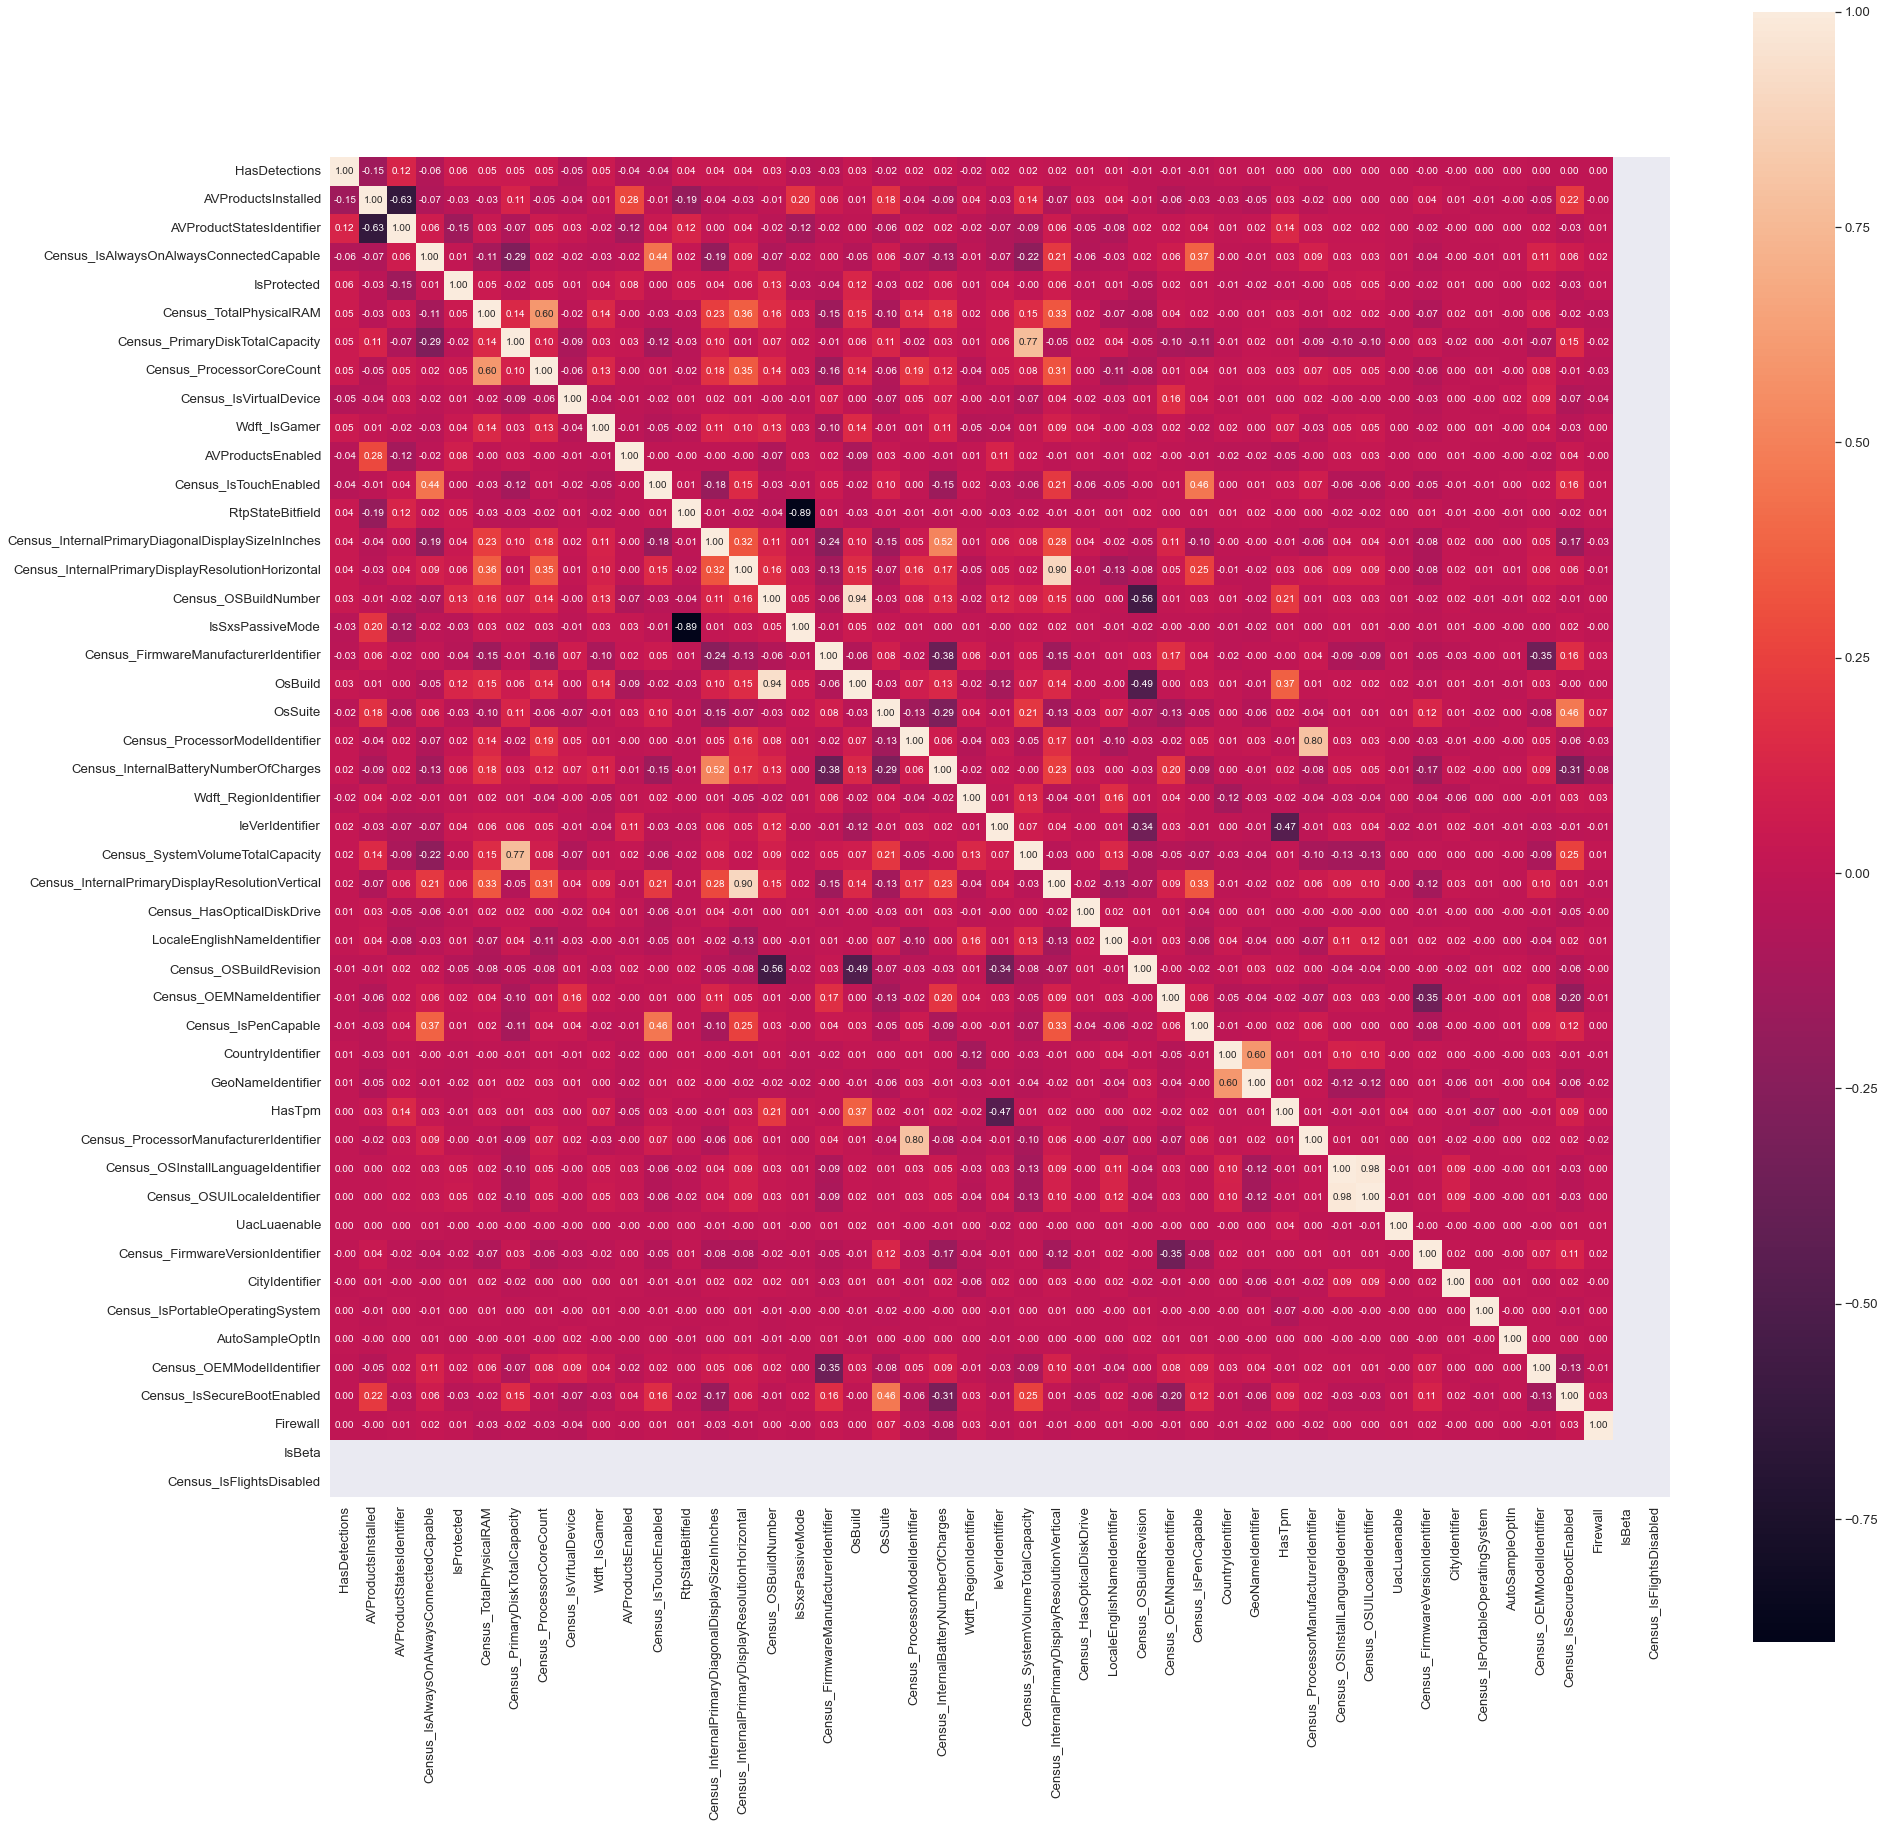

In [121]:
##  to calculate the correlation coefficient matrix specifically for the subset of columns that have the highest correlation values with the target feature 'HasDetections'.
corrmat = df_train.corr().abs()    #forming datafraem of all the absolute correlation values. This matrix represents the pairwise correlations between all columns in the DataFrame.
f, ax = plt.subplots(figsize=(30, 30))
cols = corrmat.nlargest(50, 'HasDetections')['HasDetections'].index   ##selects the top 50 columns with the highest correlation values with the column 'HasDetections'. This step identifies the columns that have the strongest correlation with the target feature 'HasDetections'.
cm = np.corrcoef(df_train[cols].values.T)                             ##calculates the correlation coefficient matrix for the selected columns in cols. This step specifically calculates the correlation between the columns in cols, providing a subset of the correlation matrix calculated earlier. It allows for a focused analysis of the correlations between the selected columns and can be used for further visualization, such as creating a heatmap using sns.heatmap.
sns.set(font_scale=1.2)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},yticklabels=cols.values, xticklabels=cols.values)
plt.show()

<AxesSubplot:xlabel='HasDetections', ylabel='count'>

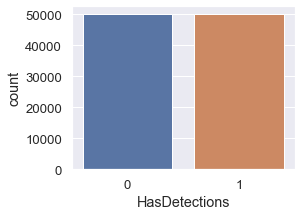

In [122]:
plt.figure(figsize=(4,3))
sns.countplot(x=df_train['HasDetections'])

In [123]:
cols

Index(['HasDetections', 'AVProductsInstalled', 'AVProductStatesIdentifier',
       'Census_IsAlwaysOnAlwaysConnectedCapable', 'IsProtected',
       'Census_TotalPhysicalRAM', 'Census_PrimaryDiskTotalCapacity',
       'Census_ProcessorCoreCount', 'Census_IsVirtualDevice', 'Wdft_IsGamer',
       'AVProductsEnabled', 'Census_IsTouchEnabled', 'RtpStateBitfield',
       'Census_InternalPrimaryDiagonalDisplaySizeInInches',
       'Census_InternalPrimaryDisplayResolutionHorizontal',
       'Census_OSBuildNumber', 'IsSxsPassiveMode',
       'Census_FirmwareManufacturerIdentifier', 'OsBuild', 'OsSuite',
       'Census_ProcessorModelIdentifier',
       'Census_InternalBatteryNumberOfCharges', 'Wdft_RegionIdentifier',
       'IeVerIdentifier', 'Census_SystemVolumeTotalCapacity',
       'Census_InternalPrimaryDisplayResolutionVertical',
       'Census_HasOpticalDiskDrive', 'LocaleEnglishNameIdentifier',
       'Census_OSBuildRevision', 'Census_OEMNameIdentifier',
       'Census_IsPenCapable', 'Cou

Text(0.5, 0.98, 'Relation between HasDetections and 25 important features')

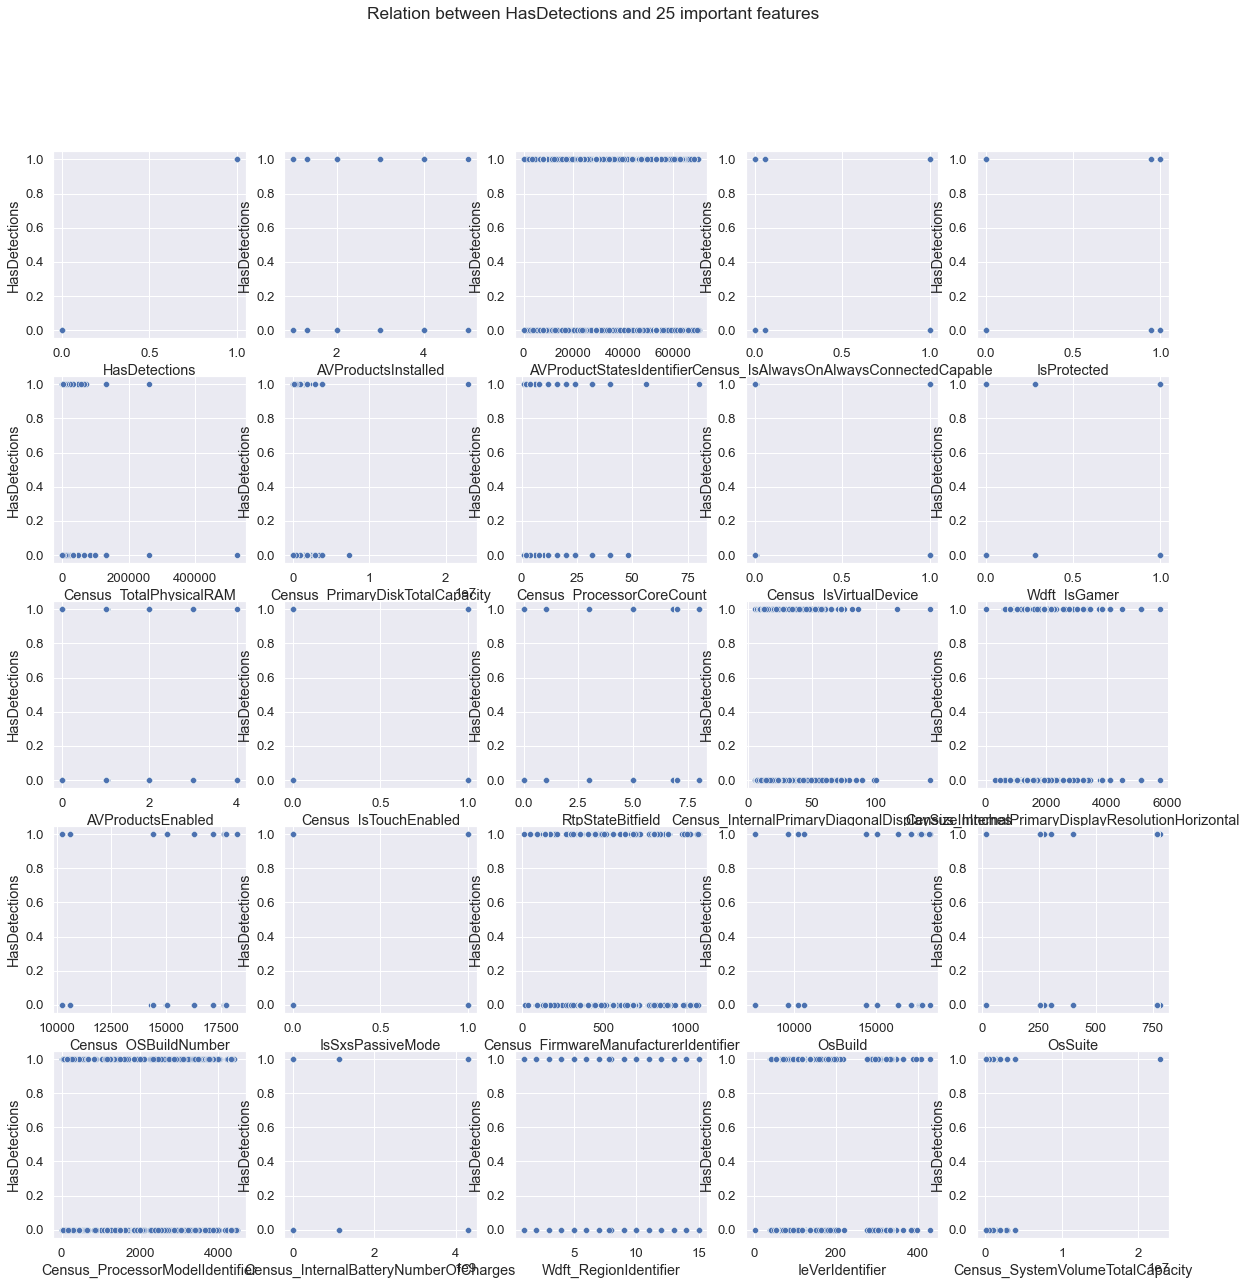

In [124]:
plt.figure(figsize=(20,20))
for i in range(len(cols[:25])):
    plt.subplot(5,5, i+1)
    sns.scatterplot(x=df_train[cols[i]], y=df_train['HasDetections'])
plt.suptitle('Relation between HasDetections and 25 important features')

Text(0.5, 0.98, 'Values for 25 important features')

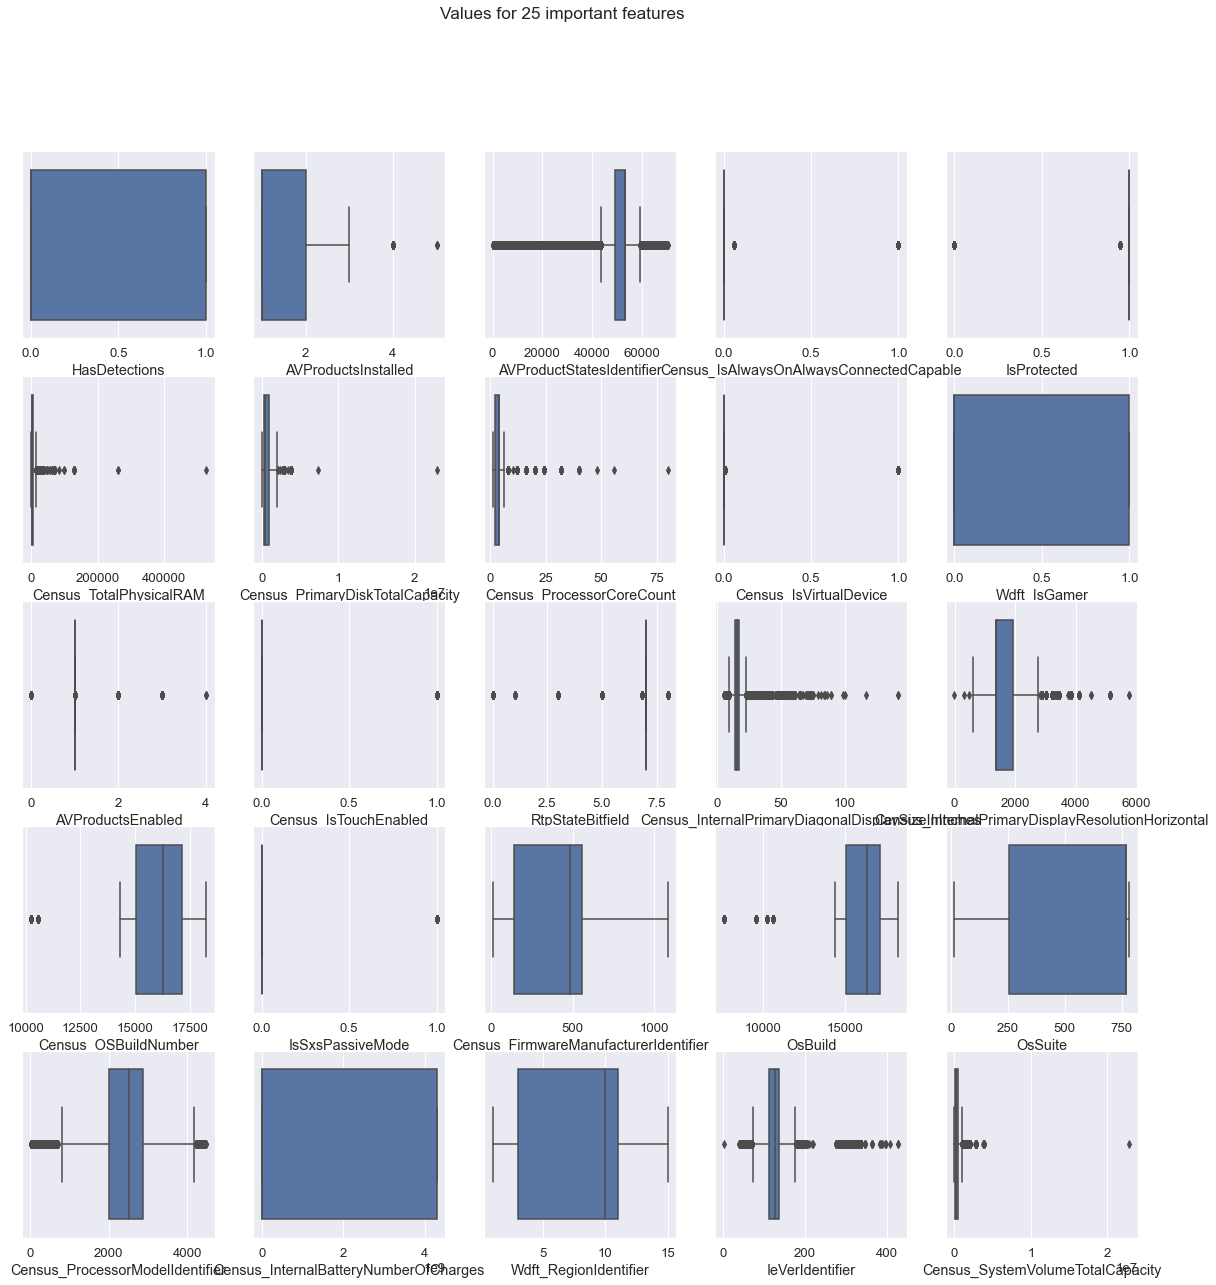

In [125]:
plt.figure(figsize=(20,20))
for i in range(len(cols[:25])):
    plt.subplot(5,5, i+1) 
    sns.boxplot(x=df_train[cols[i]])
plt.suptitle('Values for 25 important features')

In [126]:
#Making a table with columns and their distinct values' count
df_unique = df_train.nunique().to_frame().reset_index()
df_unique.columns = ['Variable', 'DistinctCount']

In [127]:
df_unique

,Variable,DistinctCount
0,ProductName,2
1,EngineVersion,42
2,AppVersion,80
3,AvSigVersion,4027
4,IsBeta,1
...,...,...
67,Census_IsPenCapable,2
68,Census_IsAlwaysOnAlwaysConnectedCapable,3
69,Wdft_IsGamer,3
70,Wdft_RegionIdentifier,16


In [128]:
df_unique.loc[df_unique['Variable'].apply(lambda x: x in cat_fea)]

,Variable,DistinctCount
0,ProductName,2
1,EngineVersion,42
2,AppVersion,80
3,AvSigVersion,4027
15,Platform,4
16,Processor,3
17,OsVer,11
20,OsPlatformSubRelease,9
21,OsBuildLab,369
22,SkuEdition,8


In [129]:
print(df_train['ProductName'].value_counts())
print((df_train['ProductName'].value_counts()*100)/100000)
# this plot shows that the data variation in this column is skewed. this column must be dropped.

win8defender    98880
mse              1120
Name: ProductName, dtype: int64
win8defender    98.88
mse              1.12
Name: ProductName, dtype: float64


In [130]:
print((df_train['EngineVersion'].value_counts()*100)/100000)

1.1.15200.1    43.187
1.1.15100.1    41.232
1.1.15000.2     2.956
1.1.14901.4     2.312
1.1.14600.4     1.731
1.1.14800.3     1.547
1.1.15300.6     1.376
1.1.14104.0     1.041
1.1.13504.0     0.820
1.1.15300.5     0.727
1.1.14700.5     0.537
1.1.14500.5     0.486
1.1.14405.2     0.422
1.1.14306.0     0.251
1.1.14202.0     0.175
1.1.14003.0     0.163
1.1.13303.0     0.128
1.1.13804.0     0.108
1.1.13407.0     0.107
1.1.13903.0     0.101
1.1.13601.0     0.087
1.1.13103.0     0.064
1.1.14305.0     0.056
1.1.13704.0     0.055
1.1.12902.0     0.050
1.1.13000.0     0.049
1.1.13701.0     0.048
1.1.13202.0     0.047
1.1.15000.1     0.030
1.1.12805.0     0.026
1.1.14901.3     0.022
1.1.14800.1     0.017
1.1.14700.3     0.016
1.1.14700.4     0.015
1.1.14201.0     0.003
1.1.11701.0     0.002
1.1.14002.0     0.001
1.1.14103.0     0.001
1.1.14303.0     0.001
1.1.13102.0     0.001
1.1.12400.0     0.001
1.1.14500.2     0.001
Name: EngineVersion, dtype: float64


In [131]:
#change the value which is less tha 10% to other
value_counts = df_train['EngineVersion'].value_counts(normalize=True)
mask = value_counts < 0.1
df_train.loc[df_train['EngineVersion'].isin(value_counts[mask].index), 'EngineVersion'] = 'Other'
df_test.loc[df_test['EngineVersion'].isin(value_counts[mask].index), 'EngineVersion'] = 'Other'
print((df_train['EngineVersion'].value_counts()*100)/100000)

1.1.15200.1    43.187
1.1.15100.1    41.232
Other          15.581
Name: EngineVersion, dtype: float64


<AxesSubplot:ylabel='None'>

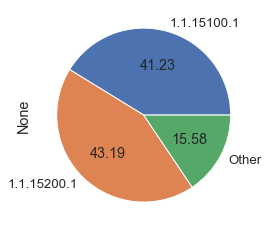

In [132]:
df_train.groupby('EngineVersion').size().plot(kind='pie', autopct='%.2f')

In [133]:
print((df_train['AppVersion'].value_counts()*100)/100000)

4.18.1807.18075     57.932
4.18.1806.18062      9.446
4.12.16299.15        3.965
4.10.209.0           3.074
4.13.17134.1         2.951
                     ...  
4.16.17656.18051     0.001
4.18.1806.20015      0.001
4.17.17677.1000      0.001
4.18.1807.18072      0.001
4.17.17686.1003      0.001
Name: AppVersion, Length: 80, dtype: float64


In [134]:
#change the value which is less tha 10% to other
value_counts = df_train['AppVersion'].value_counts(normalize=True)
mask = value_counts < 0.1
df_train.loc[df_train['AppVersion'].isin(value_counts[mask].index), 'AppVersion'] = 'Other'
df_test.loc[df_test['AppVersion'].isin(value_counts[mask].index), 'AppVersion'] = 'Other'
print((df_train['AppVersion'].value_counts()*100)/100000)

4.18.1807.18075    57.932
Other              42.068
Name: AppVersion, dtype: float64


<AxesSubplot:ylabel='None'>

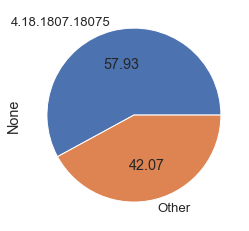

In [135]:
df_train.groupby('AppVersion').size().plot(kind='pie', autopct='%.2f')

In [136]:
print((df_train['AvSigVersion'].value_counts()*100)/100000)
#data shows that 8k different value and its string data
# dont know may be delete this

1.273.1420.0    1.140
1.263.48.0      1.076
1.275.1140.0    1.059
1.275.727.0     1.043
1.273.1826.0    0.971
                ...  
1.247.614.0     0.001
1.243.474.0     0.001
1.229.1431.0    0.001
1.225.2465.0    0.001
1.257.1460.0    0.001
Name: AvSigVersion, Length: 4027, dtype: float64


In [137]:
print((df_train['Platform'].value_counts()*100)/100000)
#data is skewed must delete

windows10      96.619
windows8        2.139
windows7        1.103
windows2016     0.139
Name: Platform, dtype: float64


In [138]:
print((df_train['Processor'].value_counts()*100)/100000)
#data is skewed must delete

x64      90.932
x86       9.063
arm64     0.005
Name: Processor, dtype: float64


In [139]:
print((df_train['OsVer'].value_counts()*100)/100000)
#data is skewed must delete

10.0.0.0      96.751
6.3.0.0        2.137
6.1.1.0        1.095
6.1.0.0        0.007
10.0.3.0       0.003
6.3.1.0        0.002
10.0.1.44      0.001
6.1.3.0        0.001
10.0.1.0       0.001
10.0.32.72     0.001
10.0.2.0       0.001
Name: OsVer, dtype: float64


In [140]:
print((df_train['OsPlatformSubRelease'].value_counts()*100)/100000)

rs4           43.955
rs3           27.909
rs2            8.903
rs1            8.157
th2            4.600
th1            2.999
windows8.1     2.139
windows7       1.103
prers5         0.235
Name: OsPlatformSubRelease, dtype: float64


In [141]:
#change the value which is less tha 5% to other
value_counts = df_train['OsPlatformSubRelease'].value_counts(normalize=True)
mask = value_counts < 0.05
df_train.loc[df_train['OsPlatformSubRelease'].isin(value_counts[mask].index), 'OsPlatformSubRelease'] = 'Other'
df_test.loc[df_test['OsPlatformSubRelease'].isin(value_counts[mask].index), 'OsPlatformSubRelease'] = 'Other'

print((df_train['OsPlatformSubRelease'].value_counts()*100)/100000)

rs4      43.955
rs3      27.909
Other    11.076
rs2       8.903
rs1       8.157
Name: OsPlatformSubRelease, dtype: float64


<AxesSubplot:ylabel='None'>

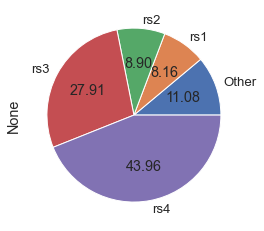

In [142]:
df_train.groupby('OsPlatformSubRelease').size().plot(kind='pie', autopct='%.2f')

In [143]:
print((df_train['OsBuildLab'].value_counts()*100)/100000)

17134.1.amd64fre.rs4_release.180410-1804                 41.056
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908    13.891
16299.15.amd64fre.rs3_release.170928-1534                10.829
15063.0.amd64fre.rs2_release.170317-1834                  8.193
17134.1.x86fre.rs4_release.180410-1804                    2.896
                                                          ...  
7601.19160.x86fre.win7sp1_gdr.160211-0600                 0.001
7601.18933.amd64fre.win7sp1_gdr.150715-0600               0.001
9600.19038.amd64fre.winblue_ltsb_escrow.180608-1416       0.001
17754.1.x86fre.rs5_release.180831-1429                    0.001
18237.1000.amd64fre.rs_prerelease.180907-1621             0.001
Name: OsBuildLab, Length: 369, dtype: float64


In [145]:
#change the value which is less tha 5% to other
value_counts = df_train['OsBuildLab'].value_counts(normalize=True)
mask = value_counts < 0.05
df_train.loc[df_train['OsBuildLab'].isin(value_counts[mask].index), 'OsBuildLab'] = 'Other'
df_test.loc[df_test['OsBuildLab'].isin(value_counts[mask].index), 'OsBuildLab'] = 'Other'
print((df_train['OsBuildLab'].value_counts()*100)/100000)

17134.1.amd64fre.rs4_release.180410-1804                 41.056
Other                                                    26.031
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908    13.891
16299.15.amd64fre.rs3_release.170928-1534                10.829
15063.0.amd64fre.rs2_release.170317-1834                  8.193
Name: OsBuildLab, dtype: float64


<AxesSubplot:ylabel='None'>

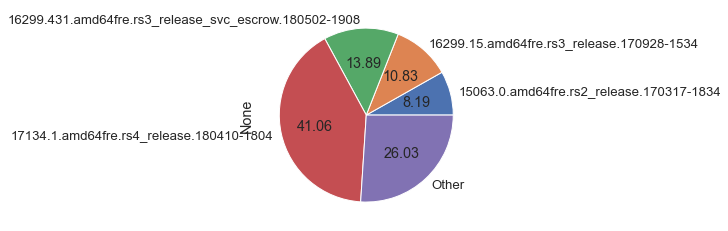

In [146]:
df_train.groupby('OsBuildLab').size().plot(kind='pie', autopct='%.2f')

In [147]:
print((df_train['SkuEdition'].value_counts()*100)/100000)

Home               61.635
Pro                36.253
Invalid             0.935
Education           0.437
Enterprise          0.397
Enterprise LTSB     0.257
Cloud               0.059
Server              0.027
Name: SkuEdition, dtype: float64


In [148]:
#change the value which is less tha 10% to other
value_counts = df_train['SkuEdition'].value_counts(normalize=True)
mask = value_counts < 0.1
df_train.loc[df_train['SkuEdition'].isin(value_counts[mask].index), 'SkuEdition'] = 'Other'
df_test.loc[df_test['SkuEdition'].isin(value_counts[mask].index), 'SkuEdition'] = 'Other'

print((df_train['SkuEdition'].value_counts()*100)/100000)

Home     61.635
Pro      36.253
Other     2.112
Name: SkuEdition, dtype: float64


<AxesSubplot:ylabel='None'>

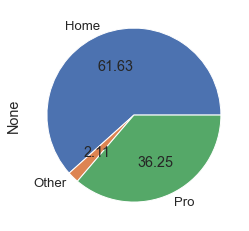

In [149]:
df_train.groupby('SkuEdition').size().plot(kind='pie', autopct='%.2f')


In [150]:
print((df_train['Census_MDC2FormFactor'].value_counts()*100)/100000)

Notebook        64.118
Desktop         21.974
Convertible      4.481
Detachable       3.386
AllInOne         3.272
PCOther          1.597
LargeTablet      0.709
SmallTablet      0.333
SmallServer      0.083
MediumServer     0.034
LargeServer      0.012
ServerOther      0.001
Name: Census_MDC2FormFactor, dtype: float64


In [151]:
#change the value which is less tha 10% to other
value_counts = df_train['Census_MDC2FormFactor'].value_counts(normalize=True)
mask = value_counts < 0.1
df_train.loc[df_train['Census_MDC2FormFactor'].isin(value_counts[mask].index), 'Census_MDC2FormFactor'] = 'Other'
df_test.loc[df_test['Census_MDC2FormFactor'].isin(value_counts[mask].index), 'Census_MDC2FormFactor'] = 'Other'
print((df_train['Census_MDC2FormFactor'].value_counts()*100)/100000)

Notebook    64.118
Desktop     21.974
Other       13.908
Name: Census_MDC2FormFactor, dtype: float64


<AxesSubplot:ylabel='None'>

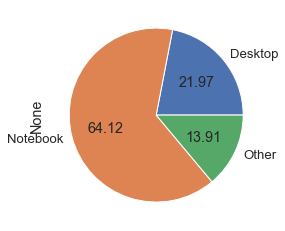

In [152]:
df_train.groupby('Census_MDC2FormFactor').size().plot(kind='pie', autopct='%.2f')


In [153]:
print((df_train['Census_DeviceFamily'].value_counts()*100)/100000)

#data is skewed must delete the column

Windows.Desktop    99.861
Windows.Server      0.139
Name: Census_DeviceFamily, dtype: float64


In [154]:
print((df_train['Census_PrimaryDiskTypeName'].value_counts()*100)/100000)

HDD            64.961
SSD            27.905
UNKNOWN         4.023
Unspecified     3.111
Name: Census_PrimaryDiskTypeName, dtype: float64


In [155]:
#change the value which is less tha 10% to other
value_counts = df_train['Census_PrimaryDiskTypeName'].value_counts(normalize=True)
mask = value_counts < 0.1
df_train.loc[df_train['Census_PrimaryDiskTypeName'].isin(value_counts[mask].index), 'Census_PrimaryDiskTypeName'] = 'UNKNOWN'
df_test.loc[df_test['Census_PrimaryDiskTypeName'].isin(value_counts[mask].index), 'Census_PrimaryDiskTypeName'] = 'UNKNOWN'
print((df_train['Census_PrimaryDiskTypeName'].value_counts()*100)/100000)

HDD        64.961
SSD        27.905
UNKNOWN     7.134
Name: Census_PrimaryDiskTypeName, dtype: float64


<AxesSubplot:ylabel='None'>

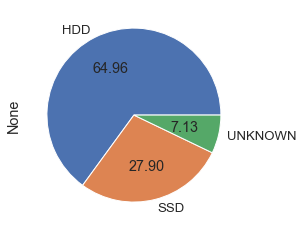

In [156]:
df_train.groupby('Census_PrimaryDiskTypeName').size().plot(kind='pie', autopct='%.2f')


In [157]:
print((df_train['Census_ChassisTypeName'].value_counts()*100)/100000)


Notebook               58.807
Desktop                21.209
Laptop                  7.562
Portable                4.055
AllinOne                2.245
MiniTower               0.928
Convertible             0.927
Other                   0.838
UNKNOWN                 0.743
Detachable              0.640
LowProfileDesktop       0.527
HandHeld                0.493
SpaceSaving             0.313
Tablet                  0.186
Unknown                 0.124
Tower                   0.123
MainServerChassis       0.116
MiniPC                  0.055
LunchBox                0.044
RackMountChassis        0.043
30                      0.005
BusExpansionChassis     0.005
SubNotebook             0.003
StickPC                 0.003
36                      0.001
82                      0.001
35                      0.001
0                       0.001
Blade                   0.001
IoTGateway              0.001
Name: Census_ChassisTypeName, dtype: float64


In [158]:
#change the value which is less tha 1% to other
value_counts = df_train['Census_ChassisTypeName'].value_counts(normalize=True)
mask = value_counts < 0.01
df_train.loc[df_train['Census_ChassisTypeName'].isin(value_counts[mask].index), 'Census_ChassisTypeName'] = 'Other'
df_test.loc[df_test['Census_ChassisTypeName'].isin(value_counts[mask].index), 'Census_ChassisTypeName'] = 'Other'

print((df_train['Census_ChassisTypeName'].value_counts()*100)/100000)

Notebook    58.807
Desktop     21.209
Laptop       7.562
Other        6.122
Portable     4.055
AllinOne     2.245
Name: Census_ChassisTypeName, dtype: float64


<AxesSubplot:ylabel='None'>

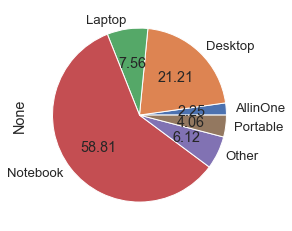

In [159]:
df_train.groupby('Census_ChassisTypeName').size().plot(kind='pie', autopct='%.2f')


In [160]:
print((df_train['Census_PowerPlatformRoleName'].value_counts()*100)/100000)


Mobile               69.269
Desktop              23.252
Slate                 5.510
Workstation           1.202
SOHOServer            0.407
UNKNOWN               0.232
EnterpriseServer      0.081
AppliancePC           0.046
PerformanceServer     0.001
Name: Census_PowerPlatformRoleName, dtype: float64


In [161]:
#change the value which is less tha 10% to other
value_counts = df_train['Census_PowerPlatformRoleName'].value_counts(normalize=True)
mask = value_counts < 0.1
df_train.loc[df_train['Census_PowerPlatformRoleName'].isin(value_counts[mask].index), 'Census_PowerPlatformRoleName'] = 'Other'
df_test.loc[df_test['Census_PowerPlatformRoleName'].isin(value_counts[mask].index), 'Census_PowerPlatformRoleName'] = 'Other'

print((df_train['Census_PowerPlatformRoleName'].value_counts()*100)/100000)

Mobile     69.269
Desktop    23.252
Other       7.479
Name: Census_PowerPlatformRoleName, dtype: float64


<AxesSubplot:ylabel='None'>

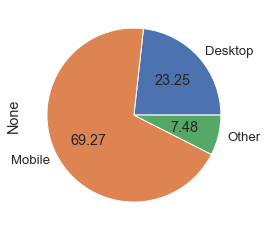

In [162]:
df_train.groupby('Census_PowerPlatformRoleName').size().plot(kind='pie', autopct='%.2f')


In [163]:
print((df_train['Census_OSVersion'].value_counts()*100)/100000)


10.0.17134.228      15.709
10.0.17134.165      10.255
10.0.16299.431       5.992
10.0.17134.285       5.267
10.0.17134.112       3.905
                     ...  
10.0.17759.1         0.001
10.0.10586.105       0.001
10.0.15063.1154      0.001
10.0.10240.17533     0.001
10.0.10240.16725     0.001
Name: Census_OSVersion, Length: 260, dtype: float64


In [164]:
#change the value which is less tha 3% to other
value_counts = df_train['Census_OSVersion'].value_counts(normalize=True)
mask = value_counts < 0.03
df_train.loc[df_train['Census_OSVersion'].isin(value_counts[mask].index), 'Census_OSVersion'] = 'Other'
print((df_train['Census_OSVersion'].value_counts()*100)/100000)

# too much variation for categorical value must delete

Other             51.408
10.0.17134.228    15.709
10.0.17134.165    10.255
10.0.16299.431     5.992
10.0.17134.285     5.267
10.0.17134.112     3.905
10.0.16299.547     3.887
10.0.16299.371     3.577
Name: Census_OSVersion, dtype: float64


In [165]:
print((df_train['Census_OSArchitecture'].value_counts()*100)/100000)
#data is skewed must delete

amd64    90.936
x86       9.059
arm64     0.005
Name: Census_OSArchitecture, dtype: float64


In [166]:
print((df_train['Census_OSBranch'].value_counts()*100)/100000)


rs4_release                  44.999
rs3_release                  13.829
rs3_release_svc_escrow       13.313
rs2_release                   9.097
rs1_release                   8.774
th2_release                   3.731
th2_release_sec               2.934
th1_st1                       2.169
th1                           0.849
rs5_release                   0.178
rs3_release_svc_escrow_im     0.074
rs_prerelease_flt             0.025
rs_prerelease                 0.025
rs5_release_sigma             0.002
rs5_release_edge              0.001
Name: Census_OSBranch, dtype: float64


In [167]:
#change the value which is less tha 5% to other
value_counts = df_train['Census_OSBranch'].value_counts(normalize=True)
mask = value_counts < 0.05
df_train.loc[df_train['Census_OSBranch'].isin(value_counts[mask].index), 'Census_OSBranch'] = 'Other'
df_test.loc[df_test['Census_OSBranch'].isin(value_counts[mask].index), 'Census_OSBranch'] = 'Other'

print((df_train['Census_OSBranch'].value_counts()*100)/100000)

rs4_release               44.999
rs3_release               13.829
rs3_release_svc_escrow    13.313
Other                      9.988
rs2_release                9.097
rs1_release                8.774
Name: Census_OSBranch, dtype: float64


<AxesSubplot:ylabel='None'>

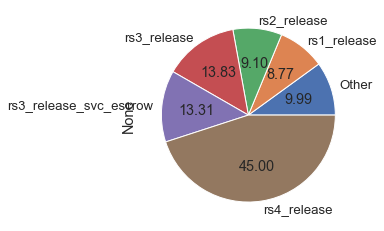

In [168]:
df_train.groupby('Census_OSBranch').size().plot(kind='pie', autopct='%.2f')

In [169]:
print((df_train['Census_OSEdition'].value_counts()*100)/100000)


Core                      38.727
Professional              35.186
CoreSingleLanguage        21.886
CoreCountrySpecific        1.862
ProfessionalEducation      0.623
Education                  0.442
Enterprise                 0.404
ProfessionalN              0.334
EnterpriseS                0.252
ServerStandard             0.107
Cloud                      0.064
CoreN                      0.056
ServerStandardEval         0.018
EducationN                 0.011
ServerDatacenterEval       0.009
EnterpriseSN               0.007
ServerSolution             0.005
EnterpriseN                0.005
ProfessionalEducationN     0.002
Name: Census_OSEdition, dtype: float64


In [170]:
#change the value which is less tha 10% to other
value_counts = df_train['Census_OSEdition'].value_counts(normalize=True)
mask = value_counts < 0.10
df_train.loc[df_train['Census_OSEdition'].isin(value_counts[mask].index), 'Census_OSEdition'] = 'Other'
df_test.loc[df_test['Census_OSEdition'].isin(value_counts[mask].index), 'Census_OSEdition'] = 'Other'
print((df_train['Census_OSEdition'].value_counts()*100)/100000)

Core                  38.727
Professional          35.186
CoreSingleLanguage    21.886
Other                  4.201
Name: Census_OSEdition, dtype: float64


<AxesSubplot:ylabel='None'>

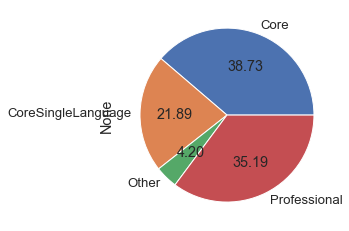

In [171]:
df_train.groupby('Census_OSEdition').size().plot(kind='pie', autopct='%.2f')


In [172]:
print((df_train['Census_OSSkuName'].value_counts()*100)/100000)


CORE                            38.725
PROFESSIONAL                    35.812
CORE_SINGLELANGUAGE             21.884
CORE_COUNTRYSPECIFIC             1.861
EDUCATION                        0.442
ENTERPRISE                       0.406
PROFESSIONAL_N                   0.335
ENTERPRISE_S                     0.252
STANDARD_SERVER                  0.107
CLOUD                            0.065
CORE_N                           0.056
STANDARD_EVALUATION_SERVER       0.018
EDUCATION_N                      0.011
DATACENTER_EVALUATION_SERVER     0.009
ENTERPRISE_S_N                   0.007
SB_SOLUTION_SERVER               0.005
ENTERPRISE_N                     0.005
Name: Census_OSSkuName, dtype: float64


In [173]:
#change the value which is less tha 10% to other
value_counts = df_train['Census_OSSkuName'].value_counts(normalize=True)
mask = value_counts < 0.10
df_train.loc[df_train['Census_OSSkuName'].isin(value_counts[mask].index), 'Census_OSSkuName'] = 'Other'
df_test.loc[df_test['Census_OSSkuName'].isin(value_counts[mask].index), 'Census_OSSkuName'] = 'Other'

print((df_train['Census_OSSkuName'].value_counts()*100)/100000)

CORE                   38.725
PROFESSIONAL           35.812
CORE_SINGLELANGUAGE    21.884
Other                   3.579
Name: Census_OSSkuName, dtype: float64


<AxesSubplot:ylabel='None'>

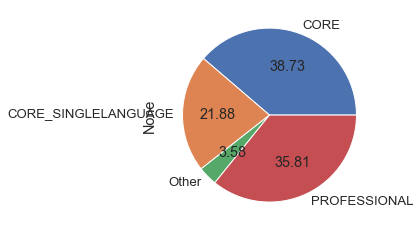

In [174]:
df_train.groupby('Census_OSSkuName').size().plot(kind='pie', autopct='%.2f')


In [176]:
print((df_train['Census_OSInstallTypeName'].value_counts()*100)/100000)


UUPUpgrade        29.329
IBSClean          18.512
Update            17.682
Upgrade           14.039
Other              9.458
Reset              7.292
Refresh            2.334
Clean              0.788
CleanPCRefresh     0.566
Name: Census_OSInstallTypeName, dtype: float64


<AxesSubplot:ylabel='None'>

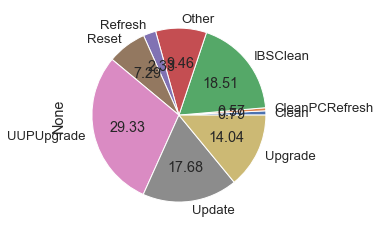

In [177]:
df_train.groupby('Census_OSInstallTypeName').size().plot(kind='pie', autopct='%.2f')


In [178]:
print((df_train['Census_OSWUAutoUpdateOptionsName'].value_counts()*100)/100000)


FullAuto                                 44.127
UNKNOWN                                  28.519
Notify                                   22.838
AutoInstallAndRebootAtMaintenanceTime     4.091
Off                                       0.286
DownloadNotify                            0.139
Name: Census_OSWUAutoUpdateOptionsName, dtype: float64


<AxesSubplot:ylabel='None'>

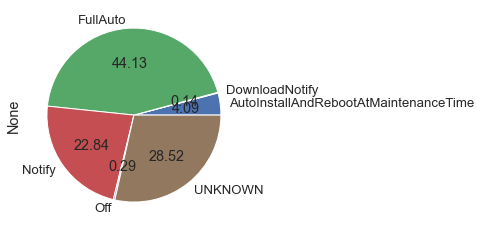

In [179]:
df_train.groupby('Census_OSWUAutoUpdateOptionsName').size().plot(kind='pie', autopct='%.2f')


In [180]:
print((df_train['Census_GenuineStateName'].value_counts()*100)/100000)
#data is skewed must delete


IS_GENUINE         88.219
INVALID_LICENSE     8.995
OFFLINE             2.635
UNKNOWN             0.151
Name: Census_GenuineStateName, dtype: float64


In [181]:
print((df_train['Census_ActivationChannel'].value_counts()*100)/100000)


Retail            52.895
OEM:DM            38.329
Volume:GVLK        5.074
OEM:NONSLP         3.559
Volume:MAK         0.116
Retail:TB:Eval     0.027
Name: Census_ActivationChannel, dtype: float64


<AxesSubplot:ylabel='None'>

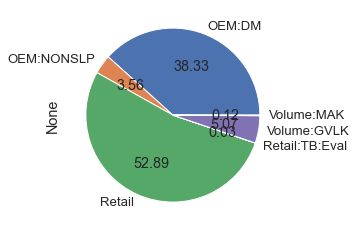

In [182]:
df_train.groupby('Census_ActivationChannel').size().plot(kind='pie', autopct='%.2f')


In [183]:
print((df_train['Census_FlightRing'].value_counts()*100)/100000)

# data is skewed must delete

Retail      93.638
NOT_SET      3.217
Unknown      2.763
WIS          0.120
RP           0.108
WIF          0.108
Disabled     0.046
Name: Census_FlightRing, dtype: float64


In [184]:
# ProductName,Processor, OsVer, Census_DeviceFamily, Census_OSArchitecture, Census_GenuineStateName, Census_FlightRing
# all of these columns data is skewed.
# must delete this
# "AvSigVersion","Census_OSVersion"
df_train.drop(columns=['ProductName','Processor', 'OsVer', 'Census_DeviceFamily', 'Census_OSArchitecture', 'Census_GenuineStateName', 'Census_FlightRing'],inplace=True)
df_test.drop(columns=['ProductName','Processor', 'OsVer', 'Census_DeviceFamily', 'Census_OSArchitecture', 'Census_GenuineStateName', 'Census_FlightRing'],inplace=True) 

In [185]:
# all of these columns have too many data for a categorical type
# must delete this
df_train.drop(columns=['AvSigVersion','Census_OSVersion'],inplace=True)
df_test.drop(columns=['AvSigVersion','Census_OSVersion',],inplace=True)

In [186]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 63 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   EngineVersion                                      100000 non-null  object 
 1   AppVersion                                         100000 non-null  object 
 2   IsBeta                                             100000 non-null  int64  
 3   RtpStateBitfield                                   100000 non-null  float64
 4   IsSxsPassiveMode                                   100000 non-null  int64  
 5   AVProductStatesIdentifier                          100000 non-null  float64
 6   AVProductsInstalled                                100000 non-null  float64
 7   AVProductsEnabled                                  100000 non-null  float64
 8   HasTpm                                             100000 non-null  int64  

In [187]:
# define numerical and categorical featutres
num_fea = [fea for fea in df_train.columns if df_train[fea].dtype !='O']
cat_fea = [fea for fea in df_train.columns if df_train[fea].dtype =='O']

# print
print(f'We have {len(num_fea)} numerical features : {num_fea}')
print(f'We have {len(cat_fea)} categorical features : {cat_fea}')

We have 47 numerical features : ['IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode', 'AVProductStatesIdentifier', 'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm', 'CountryIdentifier', 'CityIdentifier', 'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'OsBuild', 'OsSuite', 'IsProtected', 'AutoSampleOptIn', 'IeVerIdentifier', 'Firewall', 'UacLuaenable', 'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier', 'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier', 'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTotalCapacity', 'Census_SystemVolumeTotalCapacity', 'Census_HasOpticalDiskDrive', 'Census_TotalPhysicalRAM', 'Census_InternalPrimaryDiagonalDisplaySizeInInches', 'Census_InternalPrimaryDisplayResolutionHorizontal', 'Census_InternalPrimaryDisplayResolutionVertical', 'Census_InternalBatteryNumberOfCharges', 'Census_OSBuildNumber', 'Census_OSBuildRevision', 'Census_OSInstallLanguageIdentifier', 'Census_OSUILocaleIdentifier', 'Census_IsPortableOperatingSyste

In [188]:
one_hot_encoded_data = pd.get_dummies(df_train, columns = ['EngineVersion', 'AppVersion', 'Platform', 'OsPlatformSubRelease', 'OsBuildLab', 'SkuEdition', 'Census_MDC2FormFactor', 'Census_PrimaryDiskTypeName', 'Census_ChassisTypeName', 'Census_PowerPlatformRoleName', 'Census_OSBranch', 'Census_OSEdition', 'Census_OSSkuName', 'Census_OSInstallTypeName', 'Census_OSWUAutoUpdateOptionsName', 'Census_ActivationChannel'])
one_hot_encoded_test_data = pd.get_dummies(df_test, columns = ['EngineVersion', 'AppVersion', 'Platform', 'OsPlatformSubRelease', 'OsBuildLab', 'SkuEdition', 'Census_MDC2FormFactor', 'Census_PrimaryDiskTypeName', 'Census_ChassisTypeName', 'Census_PowerPlatformRoleName', 'Census_OSBranch', 'Census_OSEdition', 'Census_OSSkuName', 'Census_OSInstallTypeName', 'Census_OSWUAutoUpdateOptionsName', 'Census_ActivationChannel'])

one_hot_encoded_data

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,GeoNameIdentifier,...,Census_OSWUAutoUpdateOptionsName_FullAuto,Census_OSWUAutoUpdateOptionsName_Notify,Census_OSWUAutoUpdateOptionsName_Off,Census_OSWUAutoUpdateOptionsName_UNKNOWN,Census_ActivationChannel_OEM:DM,Census_ActivationChannel_OEM:NONSLP,Census_ActivationChannel_Retail,Census_ActivationChannel_Retail:TB:Eval,Census_ActivationChannel_Volume:GVLK,Census_ActivationChannel_Volume:MAK
0,0,7.0,0,53447.0,1.0,1.0,1,29,128035.0,35.0,...,0,0,0,1,0,0,1,0,0,0
1,0,7.0,0,53447.0,1.0,1.0,1,93,1482.0,119.0,...,0,0,0,1,0,0,1,0,0,0
2,0,7.0,0,53447.0,1.0,1.0,1,86,153579.0,64.0,...,1,0,0,0,0,1,0,0,0,0
3,0,7.0,0,53447.0,1.0,1.0,1,88,20710.0,117.0,...,1,0,0,0,0,1,0,0,0,0
4,0,7.0,0,53447.0,1.0,1.0,1,18,37376.0,277.0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,7.0,0,42086.0,2.0,1.0,1,177,75608.0,251.0,...,0,0,0,1,1,0,0,0,0,0
99996,0,7.0,0,53447.0,1.0,1.0,1,206,69788.0,276.0,...,1,0,0,0,0,0,1,0,0,0
99997,0,7.0,0,7945.0,2.0,1.0,1,93,36825.0,277.0,...,0,0,0,0,0,0,1,0,0,0
99998,0,7.0,0,53447.0,1.0,1.0,1,29,157243.0,35.0,...,1,0,0,0,0,0,1,0,0,0


## Model Training

In [203]:
#SPLIT TRAIN AND VALIDATION SET
X=one_hot_encoded_data.loc[:, one_hot_encoded_data.columns != 'HasDetections']
y= one_hot_encoded_data['HasDetections']

In [204]:
one_hot_encoded_data.shape,X.shape, y.shape

((100000, 119), (100000, 118), (100000,))

In [205]:
from sklearn.model_selection import train_test_split

In [206]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3,random_state=4)

In [209]:
X_train.shape, y_train.shape,X_val.shape

((70000, 118), (70000,), (30000, 118))

**Decision tree classifier**

In [210]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [211]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [212]:
model.score(X_train, y_train)

0.9999714285714286

In [213]:
y_predict = model.predict(X_val)

In [214]:
from sklearn.metrics import accuracy_score

In [215]:
accuracy_score(y_val,y_predict) 

0.5439

**Model is overfitted**

### Hyperparameter tuning

In [216]:
from sklearn.model_selection import GridSearchCV

In [217]:
grid_param ={
    'criterion':['gini','entropy'],
    'max_depth':range(2,32,1),
    'min_samples_leaf':range(1,10,1),
    'min_samples_split':range(2,10,1),
    'splitter':['best','random']
}

In [218]:
grid_search= GridSearchCV(estimator=model,param_grid=grid_param, cv=5)  

In [ ]:
grid_search.fit(X_train,y_train)

In [220]:
model_with_best_para= DecisionTreeClassifier(criterion= 'gini',
 max_depth = 5,
 min_samples_leaf= 4,
 min_samples_split= 4,
 splitter= 'random') 

In [221]:
model_with_best_para.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=4,
                       splitter='random')

In [222]:
model_with_best_para.score(X_train,y_train)

0.5952428571428572

In [224]:
y_pred1=model_with_best_para.predict(X_val)

In [226]:
accuracy_score(y_val,y_pred1)

0.5932

accuracy is low i.e., decision tree is not good for this, i think random forest will be the best for this

## Random forest classifier

In [227]:
from sklearn.ensemble import RandomForestClassifier

In [228]:
Rf_model = RandomForestClassifier()

In [229]:
Rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [230]:
y_pred_rf=Rf_model.predict(X_val)

In [232]:
accuracy_score(y_val,y_pred_rf)

0.6033333333333334

###### Hyperparameter tuning

In [233]:
grid_param = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}

In [234]:
from sklearn.model_selection import GridSearchCV
grid_searh=GridSearchCV(estimator=Rf_model,param_grid=grid_param,cv=3,verbose=2,n_jobs=-1)

In [ ]:
grid_searh.fit(X_train,y_train)

In [235]:
Rf_model_with_best_params=RandomForestClassifier(criterion='gini',max_depth= 5,max_features= 'auto',min_samples_leaf= 1,min_samples_split= 5,n_estimators=115)

In [236]:
Rf_model_with_best_params.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_split=5, n_estimators=115)

In [237]:
y_predict_rf_bp=Rf_model_with_best_params.predict(X_val)

In [238]:
accuracy_score(y_val,y_predict_rf_bp)

0.6005333333333334